Building Naive Bayes classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from src.data_preprocessing import TextPreprocessor
from src.naive_bayes_model import NaiveBayes

In [2]:
df = pd.read_csv('data/raw/IMDB Dataset.csv')

In [3]:
df = df.head(10000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

preprocessor = TextPreprocessor(min_occurrence=10)
preprocessor.fit(train_df['review'])

X_train = preprocessor.transform(train_df['review'])
X_test = preprocessor.transform(test_df['review'])
y_train = train_df['sentiment'].values
y_test = test_df['sentiment'].values

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8000, 9084), (8000,)
Test set shape: (2000, 9084), (2000,)


In [8]:
instance_feature_ratio = X_train.shape[0] / X_train.shape[1]
print(f"Instance to feature ratio: {instance_feature_ratio:.2f}")

Instance to feature ratio: 0.88


In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_predictions = dummy_clf.predict(X_test)

print("Dummy Classifier Accuracy:", accuracy_score(y_test, dummy_predictions))

Dummy Classifier Accuracy: 0.503


## Building my model for cross validation and testing

In [10]:
my_model = NaiveBayes()
my_model.fit(X_train, y_train)

## Cross Validation function

In [11]:
import numpy as np
from sklearn.model_selection import KFold

def k_fold_cross_validation(model, X, y, k=5):
    kf = KFold(k, shuffle = True, random_state = 42)
    scores = []
    for i, (train_index, val_index) in enumerate(kf.split(X)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model.fit(X_train_fold, y_train_fold)

        predictions = model.predict(X_val_fold)

        accuracy = accuracy_score(y_val_fold, predictions)
        scores.append(accuracy)
    mean_validation_acc = round(np.mean(scores), 3)
    std_validation_acc = round(np.std(scores), 4)
    print(f'Mean Validation Score {mean_validation_acc}')
    print(f'Standard Deviation for Validation Score {std_validation_acc}')
    print(f'The model achieved a validation accuracy of {mean_validation_acc*100}% plus/minus {std_validation_acc*100}')
    return scores

In [12]:
scores = k_fold_cross_validation(my_model, X_train, y_train, 10)
print(scores)

Mean Validation Score 0.695
Standard Deviation for Validation Score 0.0144
The model achieved a validation accuracy of 69.5% plus/minus 1.44
[0.68125, 0.695, 0.695, 0.68625, 0.70875, 0.7175, 0.665, 0.69375, 0.69875, 0.70875]


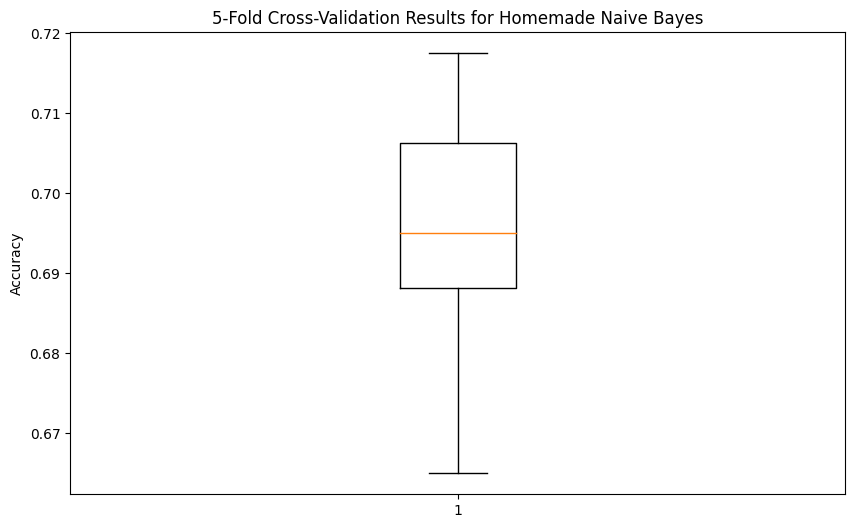

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(scores)
plt.title('5-Fold Cross-Validation Results for Homemade Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

## Evaluation of classifier on test set

In [14]:
predictions = my_model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


[[741 253]
 [320 686]]


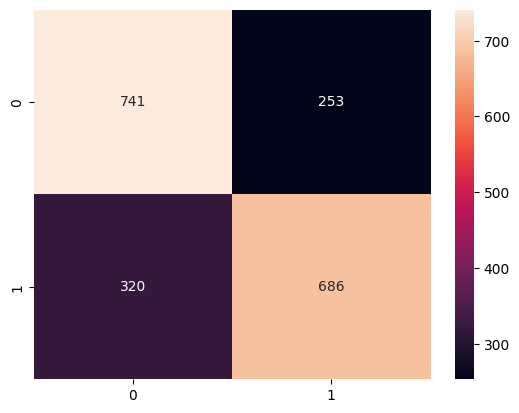

In [15]:
cm = confusion_matrix(y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

## Training and Testing Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

In [ ]:
mnb_val_scores = k_fold_cross_validation(MNB, X_train, y_train, 10)
print(mnb_val_scores)

In [ ]:
# MNB Evaluation on test set
MNB_predictions = MNB.predict(X_test)
MNB_accuracy = accuracy_score(MNB_predictions, y_test)
print(f"Accuracy: {MNB_accuracy:.2f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, MNB_predictions)
print(cm)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

## Gaussian Naive Bayes classifier from SKlearn

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
GNB = GaussianNB()

# Model training
GNB.fit(X_train, y_train)

# Predict Output
GNB_predictions = GNB.predict(X_test)

GNB_accuracy = accuracy_score(GNB_predictions, y_test)
print(f"Accuracy: {GNB_accuracy:.2f}")